In [15]:
# https://towardsdatascience.com/hands-on-bayesian-statistics-with-python-pymc3-arviz-499db9a59501

In [16]:
import warnings

import random
import pymc3 as pm
import pandas as pd

import seaborn as sns
import arviz as az

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import numpy as np
from scipy.stats import norm
from sklearn.model_selection import train_test_split

import statistics 
import re

warnings.simplefilter(action="ignore", category=FutureWarning)

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
print(f"Running on PyMC3 v{pm.__version__}")
print(f"Running on ArviZ v{az.__version__}")

Running on PyMC3 v3.11.4
Running on ArviZ v0.11.4


In [17]:
# help(pm.Normal)
# dir(pm.distributions.mixture)

In [18]:
# Uploading Comparator TID Data
# From '_Raw_TID_Data.xlsx'

dataURL = '/Users/rhnederlander/Desktop/LiDARPyMC3/LiDAR_Data/Comparator/TID/DataLoc/_Raw_TID_Data.xlsx'

# Separating Excel File by Page

# Part 1
df_dataset1 = pd.read_excel(dataURL, sheet_name="ra0591_biased", engine='openpyxl').dropna(how='all')
df_dataset1.columns=['Dose_krad', 'Device1', 'Device2', 'Device3', 'Device4', 'Device5']
# print(df_dataset1)

# Part 2
df_dataset2 = pd.read_excel(dataURL, sheet_name="ra0592_biased", engine='openpyxl').dropna(how='all')
df_dataset2.columns=['Dose_krad', 'Device1', 'Device2', 'Device3', 'Device4', 'Device5']
# print(df_dataset2)

# Part 3
# df_dataset3 = pd.read_excel(dataURL, sheet_name="ra0594_biased", engine='openpyxl').dropna(how='all')
# df_dataset3.columns=['Dose_krad', 'Device1', 'Device2', 'Device3', 'Device4', 'Device5']
# print(df_dataset3)

# Part 4
df_dataset4 = pd.read_excel(dataURL, sheet_name="ra0694_biased", engine='openpyxl').dropna(how='all')
df_dataset4.columns=['Dose_krad', 'Control', 'Device1', 'Device2', 'Device3', 'Device4', 'Device5']
# print(df_dataset4)

# # Part 5
# df_dataset5_DUT1 = pd.read_excel(dataURL, sheet_name="ra0726_DUT1", engine='openpyxl').dropna(how='all')
# df_dataset5_DUT1.columns=['Dose_krad', 'Reference', 'Device1', 'Device2', 'Device3']
# # print(df_ra0726_DUT1)

# # Part 6
# df_dataset5_DUT2 = pd.read_excel(dataURL, sheet_name="ra0726_DUT2", engine='openpyxl').dropna(how='all')
# df_dataset5_DUT2.columns=['Dose_krad', 'Reference', 'Device1', 'Device2', 'Device3']
# # print(df_ra0726_DUT2)

# # Part 7
# df_dataset5_DUT3 = pd.read_excel(dataURL, sheet_name="ra0726_DUT1", engine='openpyxl').dropna(how='all')
# df_dataset5_DUT3.columns=['Dose_krad', 'Reference', 'Device1', 'Device2', 'Device3']
# # print(df_ra0726_DUT3)

# # Part 8
# df_dataset5_DUT4 = pd.read_excel(dataURL, sheet_name="ra0726_DUT1", engine='openpyxl').dropna(how='all')
# df_dataset5_DUT4.columns=['Dose_krad', 'Reference', 'Device1', 'Device2', 'Device3']
# # print(df_ra0726_DUT4)

In [19]:
# Calculating Avol Degradation Factor (ADF) for each device
# As well as saving it
# ra0591

dataset1_Device1_ADF = (
    df_dataset1["Device1"][5] / df_dataset1["Device1"][0]
)
dataset1_Device2_ADF = (
    df_dataset1["Device2"][5] / df_dataset1["Device2"][0]
)
dataset1_Device3_ADF = (
    df_dataset1["Device3"][5] / df_dataset1["Device3"][0]
)
dataset1_Device4_ADF = (
    df_dataset1["Device4"][5] / df_dataset1["Device4"][0]
)
dataset1_Device5_ADF = (
    df_dataset1["Device5"][5] / df_dataset1["Device5"][0]
)

In [20]:
# Calculating Avol Degradation Factor (ADF) for each device
# As well as saving it
# ra0592

dataset2_Device1_ADF = (
    df_dataset2["Device1"][4] / df_dataset2["Device1"][0]
)
dataset2_Device2_ADF = (
    df_dataset2["Device2"][4] / df_dataset2["Device2"][0]
)
dataset2_Device3_ADF = (
    df_dataset2["Device3"][4] / df_dataset2["Device3"][0]
)
dataset2_Device4_ADF = (
    df_dataset2["Device4"][4] / df_dataset2["Device4"][0]
)
dataset2_Device5_ADF = (
    df_dataset2["Device5"][4] / df_dataset2["Device5"][0]
)

In [21]:
# # Calculating Avol Degradation Factor (ADF) for each device
# # As well as saving it
# # ra0594

# dataset3_Device1_ADF = (
#     df_dataset3["Device1"][4] / df_dataset3["Device1"][0]
# )
# dataset3_Device2_ADF = (
#     df_dataset3["Device2"][4] / df_dataset3["Device2"][0]
# )
# dataset3_Device3_ADF = (
#     df_dataset3["Device3"][4] / df_dataset3["Device3"][0]
# )
# dataset3_Device4_ADF = (
#     df_dataset3["Device4"][4] / df_dataset3["Device4"][0]
# )
# dataset3_Device5_ADF = (
#     df_dataset3["Device5"][4] / df_dataset3["Device5"][0]
# )

In [22]:
# Calculating Avol Degradation Factor (ADF) for each device
# As well as saving it
# ra0694

dataset4_Device1_ADF = (
    df_dataset4["Device1"][6] / df_dataset4["Device1"][0]
)
dataset4_Device2_ADF = (
    df_dataset4["Device2"][6] / df_dataset4["Device2"][0]
)
dataset4_Device3_ADF = (
    df_dataset4["Device3"][6] / df_dataset4["Device3"][0]
)
dataset4_Device4_ADF = (
    df_dataset4["Device4"][6] / df_dataset4["Device4"][0]
)
dataset4_Device5_ADF = (
    df_dataset4["Device5"][6] / df_dataset4["Device5"][0]
)

In [23]:
# Save the Mean and Std of all Device's Avol Degradation Factor (ADF)

data111 = [
        dataset1_Device1_ADF,
        dataset1_Device2_ADF, 
        dataset1_Device3_ADF, 
        dataset1_Device4_ADF, 
        dataset1_Device5_ADF
        ]

data222 = [
        dataset2_Device1_ADF,
        dataset2_Device2_ADF, 
        dataset2_Device3_ADF, 
        dataset2_Device4_ADF,
        dataset2_Device5_ADF
        ]

# data333 = [
#         dataset3_Device1_ADF,
#         dataset3_Device2_ADF, 
#         dataset3_Device3_ADF, 
#         dataset3_Device4_ADF, 
#         dataset3_Device5_ADF,
#         ]

data444 = [
        dataset4_Device1_ADF, 
        dataset4_Device2_ADF, 
        dataset4_Device3_ADF, 
        dataset4_Device4_ADF, 
        dataset4_Device5_ADF
        ]

allParts_meanList = data111 + data222 + data333 + data444
allParts_meanList = data111 + data222 + data444

allParts_mean = statistics.fmean(allParts_meanList)
allParts_std = statistics.fmean(allParts_meanList)

In [24]:
# Applying Bayesian Confidence Intervals for the Mean, Variance, and Standard Deviation

from scipy import stats

res_mean, res_var, res_std = stats.bayes_mvs(allParts_meanList)

(0.0, 3.0)

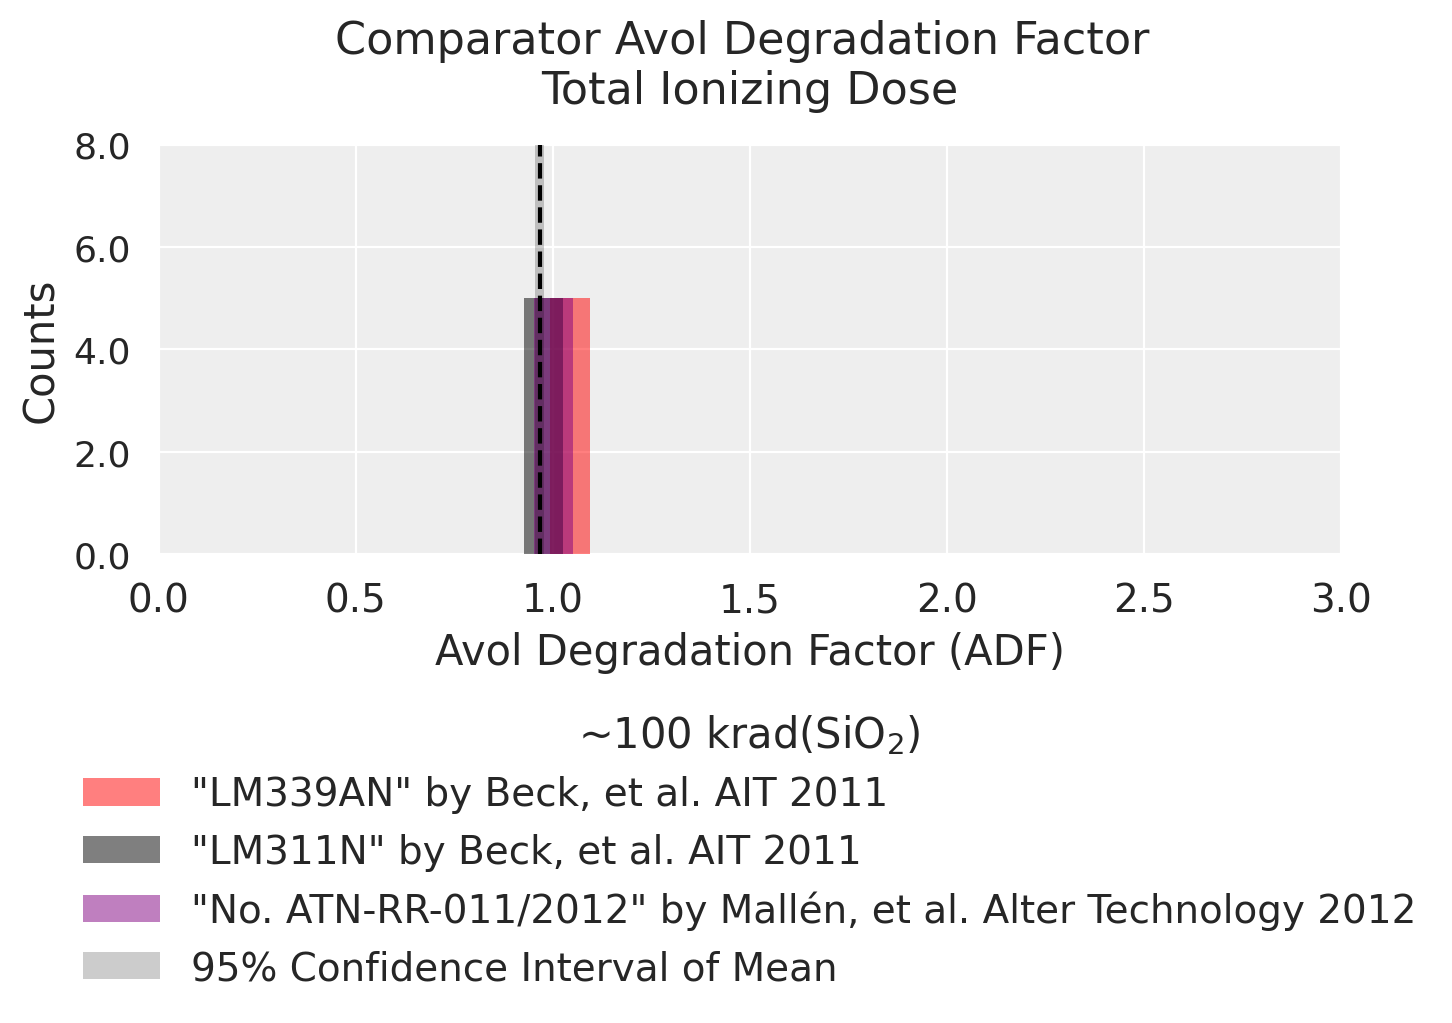

In [25]:
# Gaussian Inferences for Avol Degradation Factor (ADF)
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html
# https://medium.com/analytics-vidhya/kde-vs-pdf-in-python-53ffbf578995

# Specifying bin width to use
w=0.1

data1 = allParts_meanList
axe1 = plt.hist(
    data111, 
    label='"LM339AN" by Beck, et al. AIT 2011', 
    color="red",
    bins=np.arange(min(data111), max(data111) + w, w),
    range=[0, 8],
    alpha=0.5,
    histtype='stepfilled'
    # edgecolor='black',
    # linewidth=1.2    
    # density=True
)
axe2 = plt.hist(
    data222, 
    label='"LM311N" by Beck, et al. AIT 2011', 
    color="black",
    bins=np.arange(min(data222), max(data222) + w, w),
    range=[0, 8],
    alpha=0.5,
    histtype='stepfilled'
    # edgecolor='black',
    # linewidth=1.2    
    # density=True
)
# axe3 = plt.hist(
#     data333, 
#     label='"HS9-139RH" by Beck, et al. AIT 2011', 
#     color="blue",
#     bins=np.arange(min(data333), max(data333) + w, w),
#     range=[0, 8],
#     alpha=0.5,
#     histtype='stepfilled'
#     # edgecolor='black',
#     # linewidth=1.2    
#     # density=True
# )
axe4 = plt.hist(
    data444, 
    label='"No. ATN-RR-011/2012" by Mallén, et al. Alter Technology 2012', 
    color="purple",
    bins=np.arange(min(data444), max(data444) + w, w),
    range=[0, 8],
    alpha=0.5,
    histtype='stepfilled'
    # edgecolor='black',
    # linewidth=1.2    
    # density=True
)
plt.axvline(np.mean(allParts_meanList), color="black", linestyle='dashed')

# Plotting Bayesian confidence intervals
# Mean
plt.axvspan(res_mean.minmax[0],res_mean.minmax[1], facecolor='black', alpha=0.2, label=r'95% Confidence Interval of Mean')
# Standard Deviation
# plt.axvspan(res_std.minmax[0],res_std.minmax[1], facecolor='g', alpha=0.2, label=r'95% confidence interval of Standard Deviation')

# sns.kdeplot(
#     allParts_meanList.dropna().values,
#     color='red',
#     label="PDF"
# )

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3)).set_title('~100 krad($\mathregular{SiO_2}$)', prop = {'size':15})

plt.title("Comparator Avol Degradation Factor \nTotal Ionizing Dose", pad=15)

plt.ylabel('Counts')
plt.ylim([0, 8])
plt.yticks(fontsize=13)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.tick_params(axis="y",direction="in", pad=10)

plt.xlabel('Avol Degradation Factor (ADF)')
# plt.xticks(np.arange(0, 8.5, 0.5), fontsize=13)
plt.tick_params(axis="x",direction="in", pad=10)
plt.xlim([0.0, 3.0])

(0.0, 3.0)

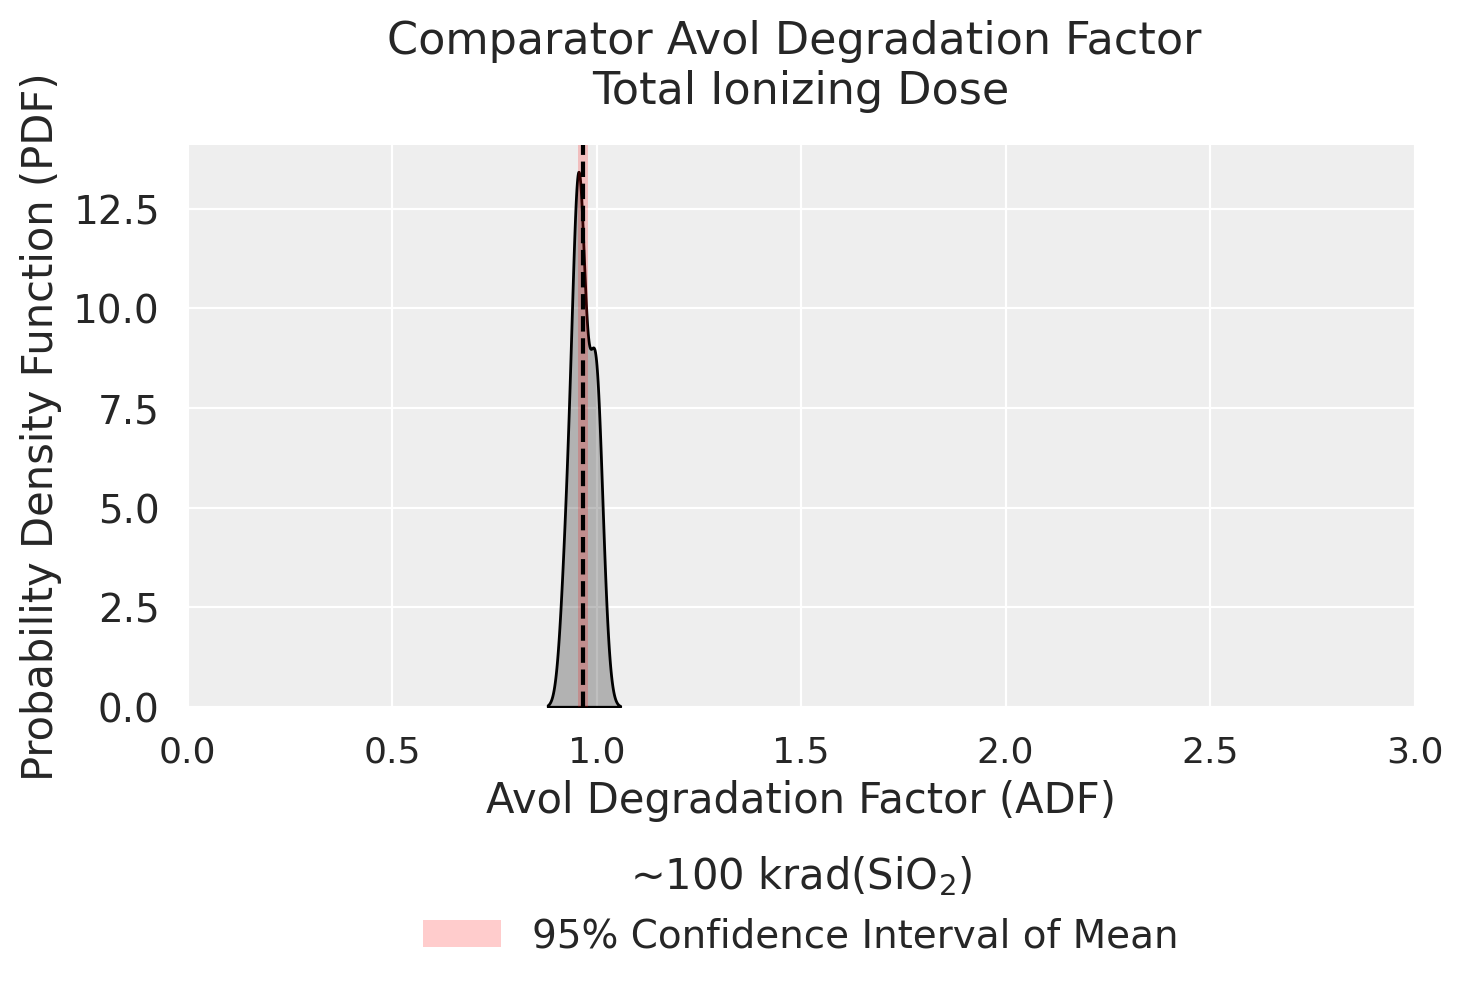

In [42]:
# Gaussian Inferences for Avols
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html
# https://medium.com/analytics-vidhya/kde-vs-pdf-in-python-53ffbf578995

# Specifying bin width to use
w=0.1

# Avol Degradation at 100K
sns.kdeplot(
    allParts_meanList,
    color='black',
    fill='True'
)
plt.axvline(np.mean(allParts_meanList), color='black', linestyle='dashed')

# Plotting Bayesian confidence intervals
# Mean
plt.axvspan(res_mean.minmax[0],res_mean.minmax[1], facecolor='red', alpha=0.2, label=r'95% Confidence Interval of Mean')
# Standard Deviation
# plt.axvspan(res_std.minmax[0],res_std.minmax[1], facecolor='g', alpha=0.2, label=r'95% confidence interval of Standard Deviation')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2)).set_title('~100 krad($\mathregular{SiO_2}$)', prop = {'size':15})
plt.title("Comparator Avol Degradation Factor \nTotal Ionizing Dose", pad=15)

plt.ylabel('Probability Density Function (PDF)')
# plt.ylim([0, 5])
# plt.yticks(np.linspace(0, 1, 11), fontsize=13)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.tick_params(axis="y",direction="in", pad=10)

plt.xlabel('Avol Degradation Factor (ADF)')
plt.xticks(np.arange(0, 3.50, 0.5), fontsize=13)
plt.tick_params(axis="x",direction="in", pad=10)
plt.xlim([0.0, 3.0])

In [27]:
# Writing the model based on all lots of Comparator data
# 100K

with pm.Model() as model_comp_100K:
    µ = pm.Uniform('µ', lower=0, upper=5)
    # Unsure about mean ADF so prior reflects this ambiguity
    
    σ = pm.HalfNormal('σ', sd=5)
    # Unsure about standard deviation of ADF so prior reflects this ambiguity
    
    y_100K = pm.Normal('y_100K', mu=µ, sd=𝜎, observed=allParts_meanList)
    # Specifies the likelihood. Conditioning the unknown on the knowns (data)
    
    trace_comp_100K = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/usr/local/lib/python3.8/site-packages/theano/tensor/elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, µ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 71 seconds.
WARNING (aesara.configdefaults): g++ not detected ! Aesara will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


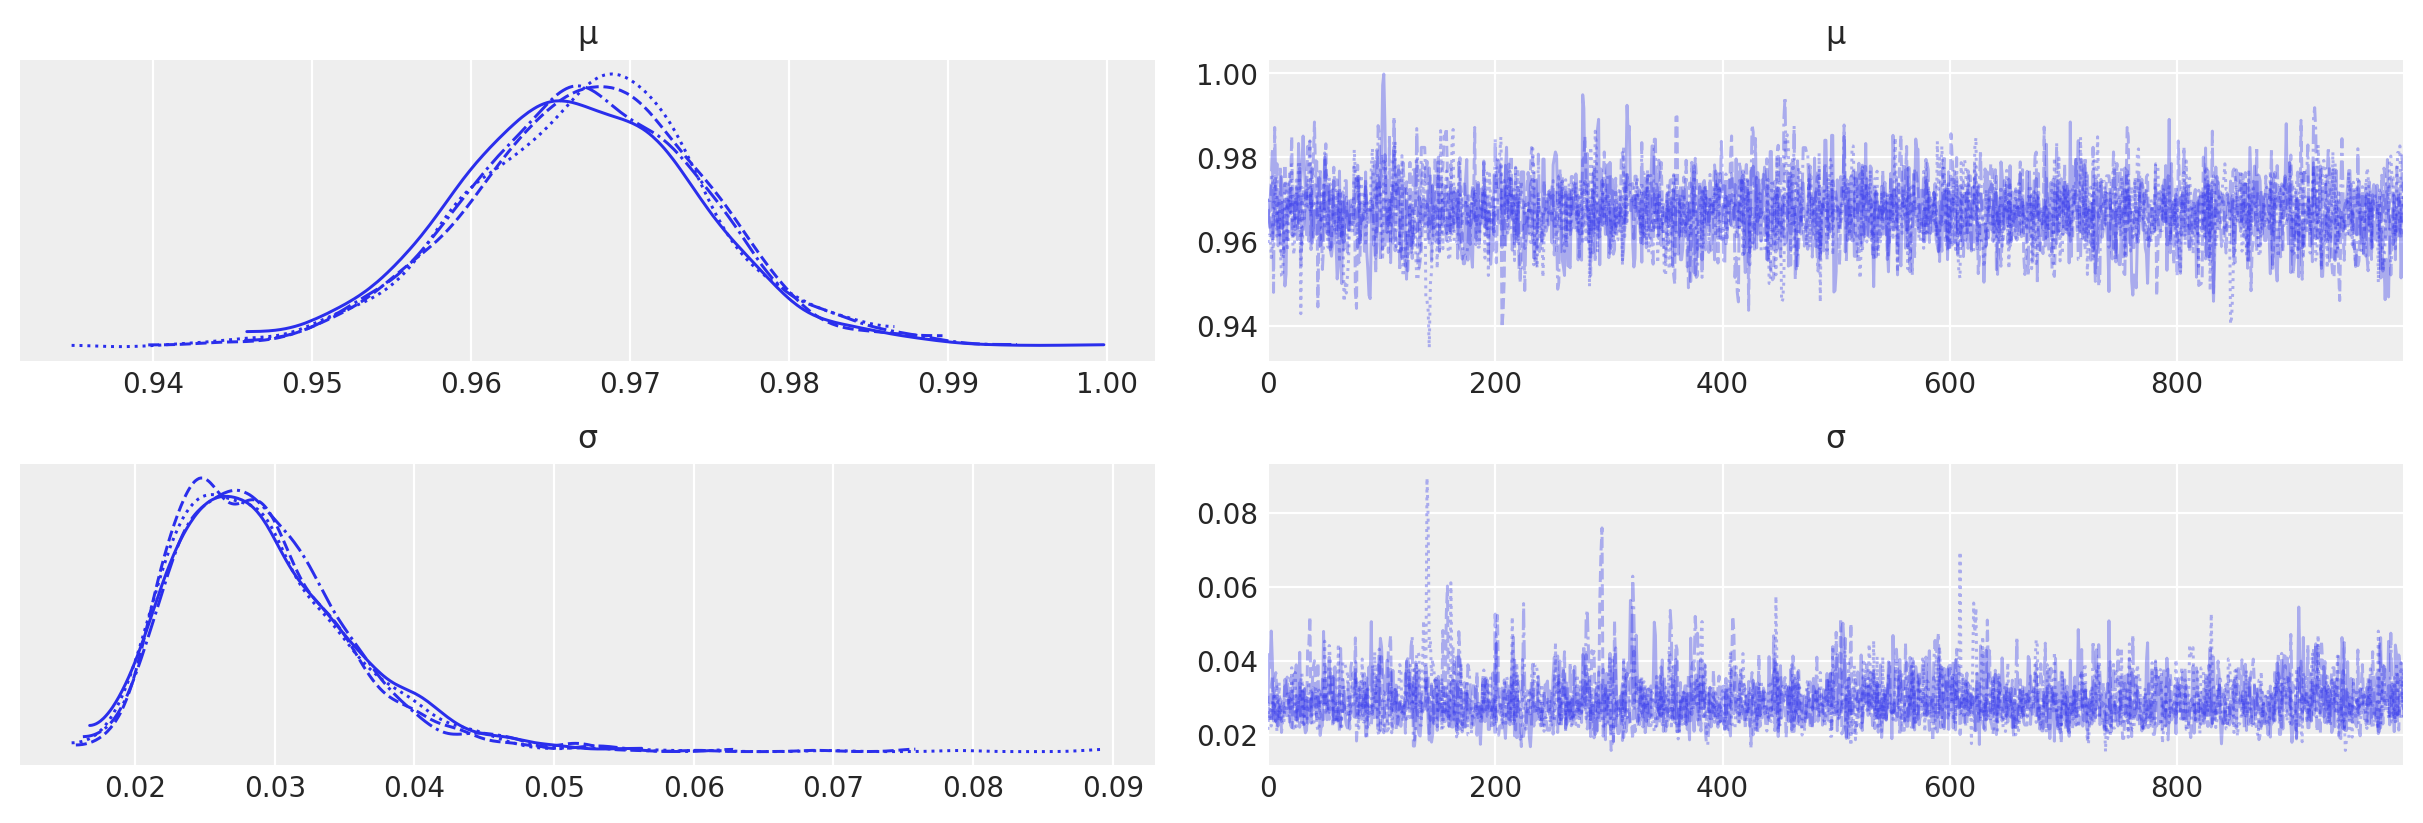

In [28]:
# Plotting the Gaussian Model Trace

axes1 = az.plot_trace(trace_comp_100K);
# axes1[0,0].set_title("")
# axes1[0,0].set_ylabel('Probability Density', size = 10.0)
# axes1[0,0].set_xlabel('ln(µ)', size = 10.0)
# axes1[0,1].set_title("")
# axes1[0,1].set_ylabel('ln(µ)', size = 10.0)
# axes1[0,1].set_xlabel('Counts', size = 10.0)
# axes1[1,0].set_title("")
# axes1[1,0].set_ylabel('Probability Density', size = 10.0)
# axes1[1,0].set_xlabel('ln(σ)', size = 10.0)
# axes1[1,1].set_title("")
# axes1[1,1].set_ylabel('ln(σ)', size = 10.0)
# axes1[1,1].set_xlabel('Counts', size = 10.0)

# KDE plots on (on left)
# Individual sample values at each step during sampling (on right)

Got error No model on context stack. trying to find log_likelihood in translation.


Text(0.5, 1.0, 'ADF Parameters at TID of 100K')

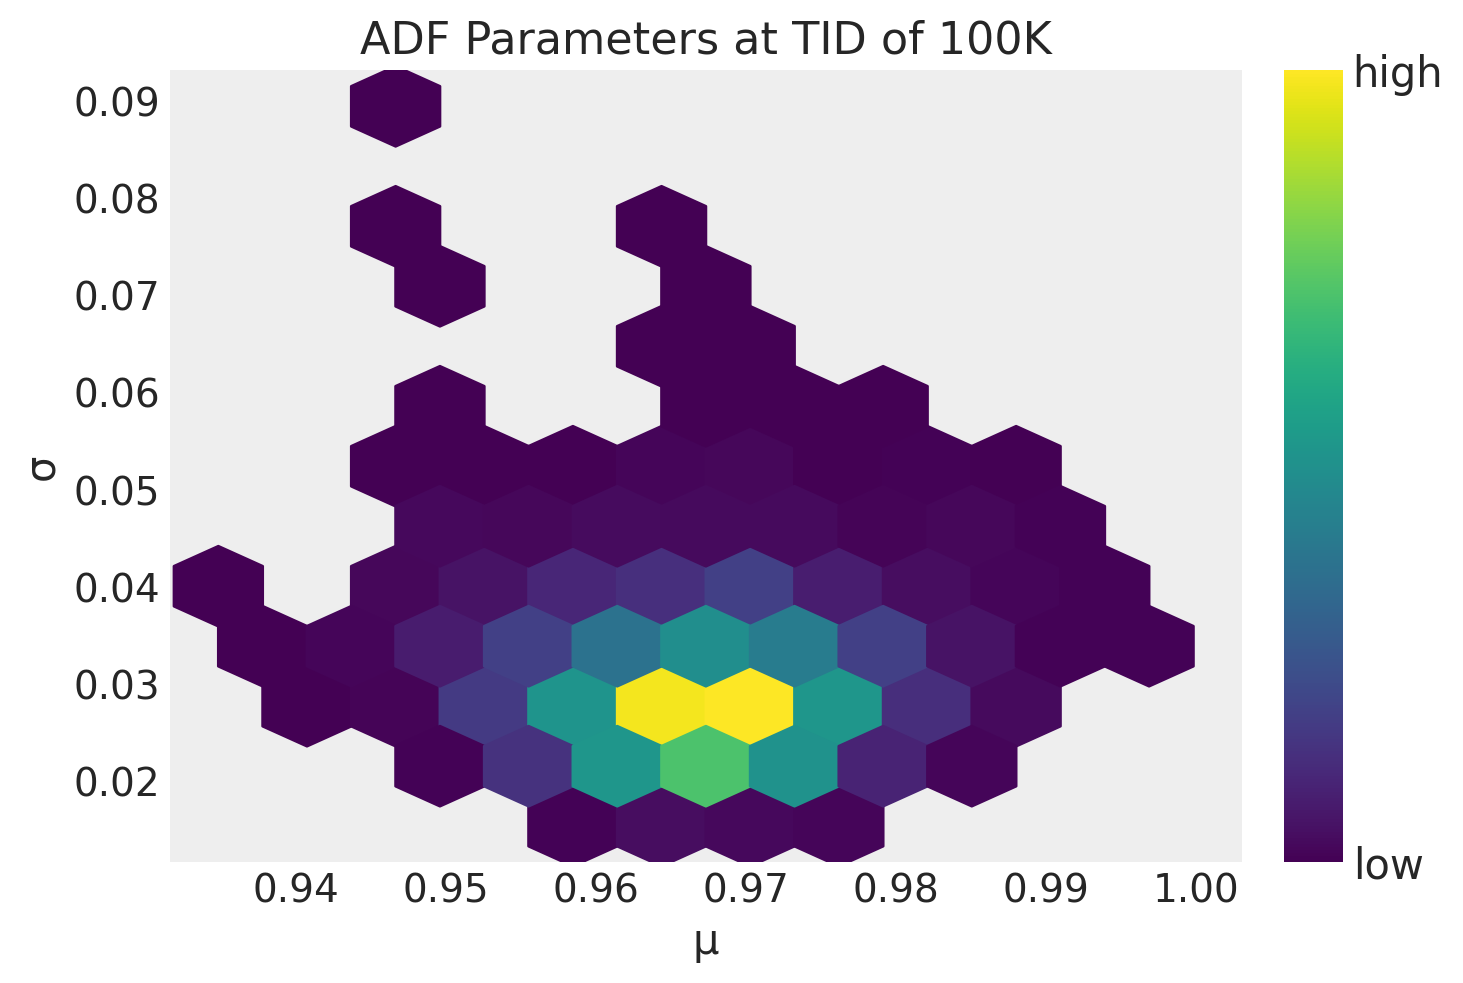

In [29]:
# Joint Distributions of Parameters

# https://www.python-graph-gallery.com/84-hexbin-plot-with-matplotlib
# A hexbin represents 2 variables when user has lots of data points. Without overlapping the points, the window splits into hexbins. Color of each hexbin denotes number of points.
# The number of hexagons in the x-direction. The corresponding number of hexagons in the y-direction is chosen such that the hexagons are approximately regular. Alternatively, gridsize can be a tuple with two elements specifying the number of hexagons in the x-direction and the y-direction.

az.plot_pair(trace_comp_100K, kind='hexbin', fill_last=False, colorbar=True);
plt.title("ADF Parameters at TID of 100K")

# No observed correlation between the parameters (no collinearity in model)

In [30]:
# Summary of the Posterior Distribution for Each Parameter
# https://arviz-devs.github.io/arviz/api/generated/arviz.summary.html

# az.summary(trace_bjt_100K)

Got error No model on context stack. trying to find log_likelihood in translation.


Text(0.5, 0, 'σ')

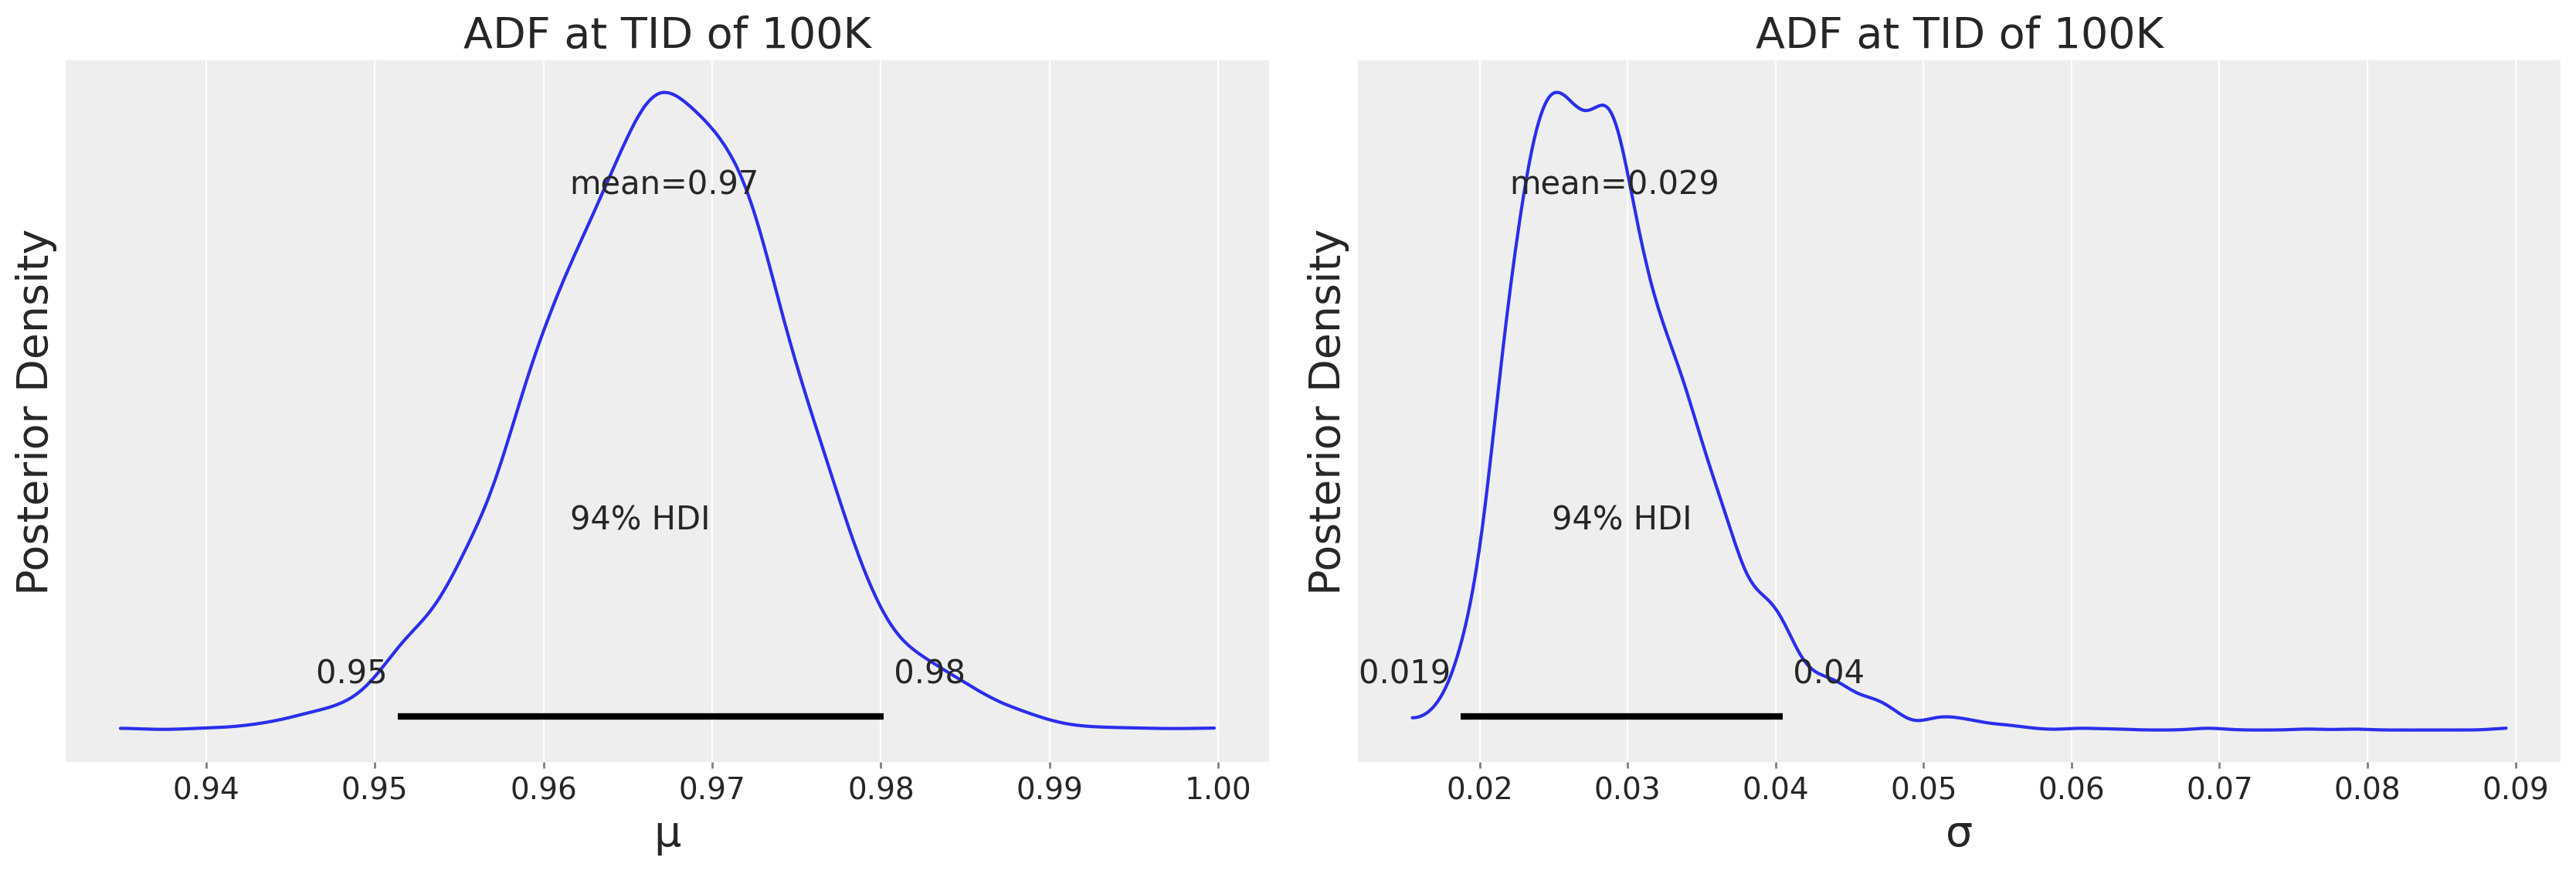

In [31]:
# Bayesian Inference at 100 krad(SiO2)

ax = az.plot_posterior(trace_comp_100K)
ax[0].set_title("ADF at TID of 100K", size = 20.0)
ax[0].set_ylabel('Posterior Density', size = 20.0)
ax[0].set_xlabel('µ', size = 20.0)
ax[1].set_title("ADF at TID of 100K", size = 20.0)
ax[1].set_ylabel('Posterior Density', size = 20.0)
ax[1].set_xlabel('σ', size = 20.0)

# HDI = Highest Density Interval => the credible interval (analogous to confidence interval)
# 94% probability that mean GDF is between 0.77 and 0.83
# 94% probability that standard deviation of GDF is between 0.17 and 0.21

In [32]:
# Verify the convergence of the chains formally using the Gelman Rubin test
# The Gelman-Rubin diagnostic r_hat doesn’t indicate any problem (values are all close to 1). You could try re-running the model with a different seed and see if this still holds.

az.summary(trace_comp_100K)['r_hat'].values

Got error No model on context stack. trying to find log_likelihood in translation.


array([1., 1.])

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


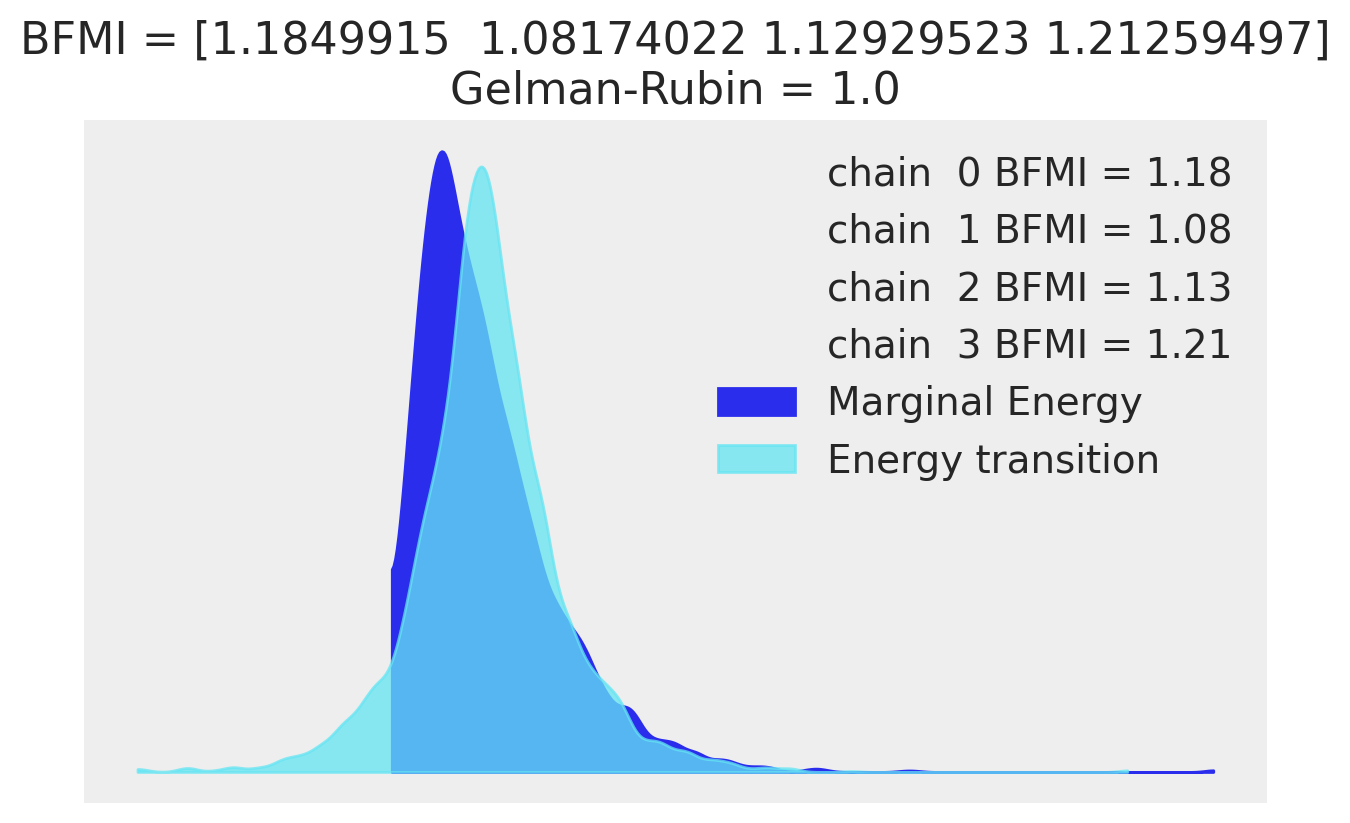

In [33]:
# Plotting Gelman-Rubin Test
# https://www.stata.com/features/overview/gelman-rubin-convergence-diagnostic/
# https://arviz-devs.github.io/arviz/api/generated/arviz.bfmi.html

bfmi = pm.bfmi(trace_comp_100K)
max_gr = max(np.max(gr_stats) for gr_stats in az.summary(trace_comp_100K)['r_hat'].values)
(az.plot_energy(trace_comp_100K, legend=True, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr)));

# Our model has converged well and the Gelman-Rubin statistic looks fine

In [34]:
# Posterior Predictive Checks (PPCs)

# Validates model => generates data from model using parameters that draws from the posterior.
# Using the posterior, we simulate results to derive predictions.
# Following function will randomly draw 1000 samples of parameters from the trace. Then, for each sample, it will draw 124 random numbers from a normal distri ution specified by the values of mu and sigma in that sample.

ppc100K = pm.sample_posterior_predictive(trace_comp_100K, samples=1000, model=model_comp_100K)
np.asarray(ppc100K['y_100K'].shape)

# Now, ppc contains 1000 generated data sets (containing 124 samples each), each using a different parameter setting from the posterior.

/usr/local/lib/python3.8/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


array([1000,   15])

In [35]:
# Plotting Posterior Predictive of the Mean for 100 krad(SiO2)

# _, ax = plt.subplots(figsize=(10, 5))
# ax.hist([y.mean() for y in ppc100K['y_100K']], bins=19, alpha=0.5)
# ax.axvline(mergedParts['GainDegradation_100K'].dropna().values.mean())
# ax.set(title='Posterior Predictive of the Mean at TID of 100K', xlabel='µ(GDF)', ylabel='Counts');

# The inferred mean is very close to the actual degradation mean.

Text(0.5, 1.0, 'Posteriors Predictive of the Comparator Mean ADF \nTotal Ionizing Dose')

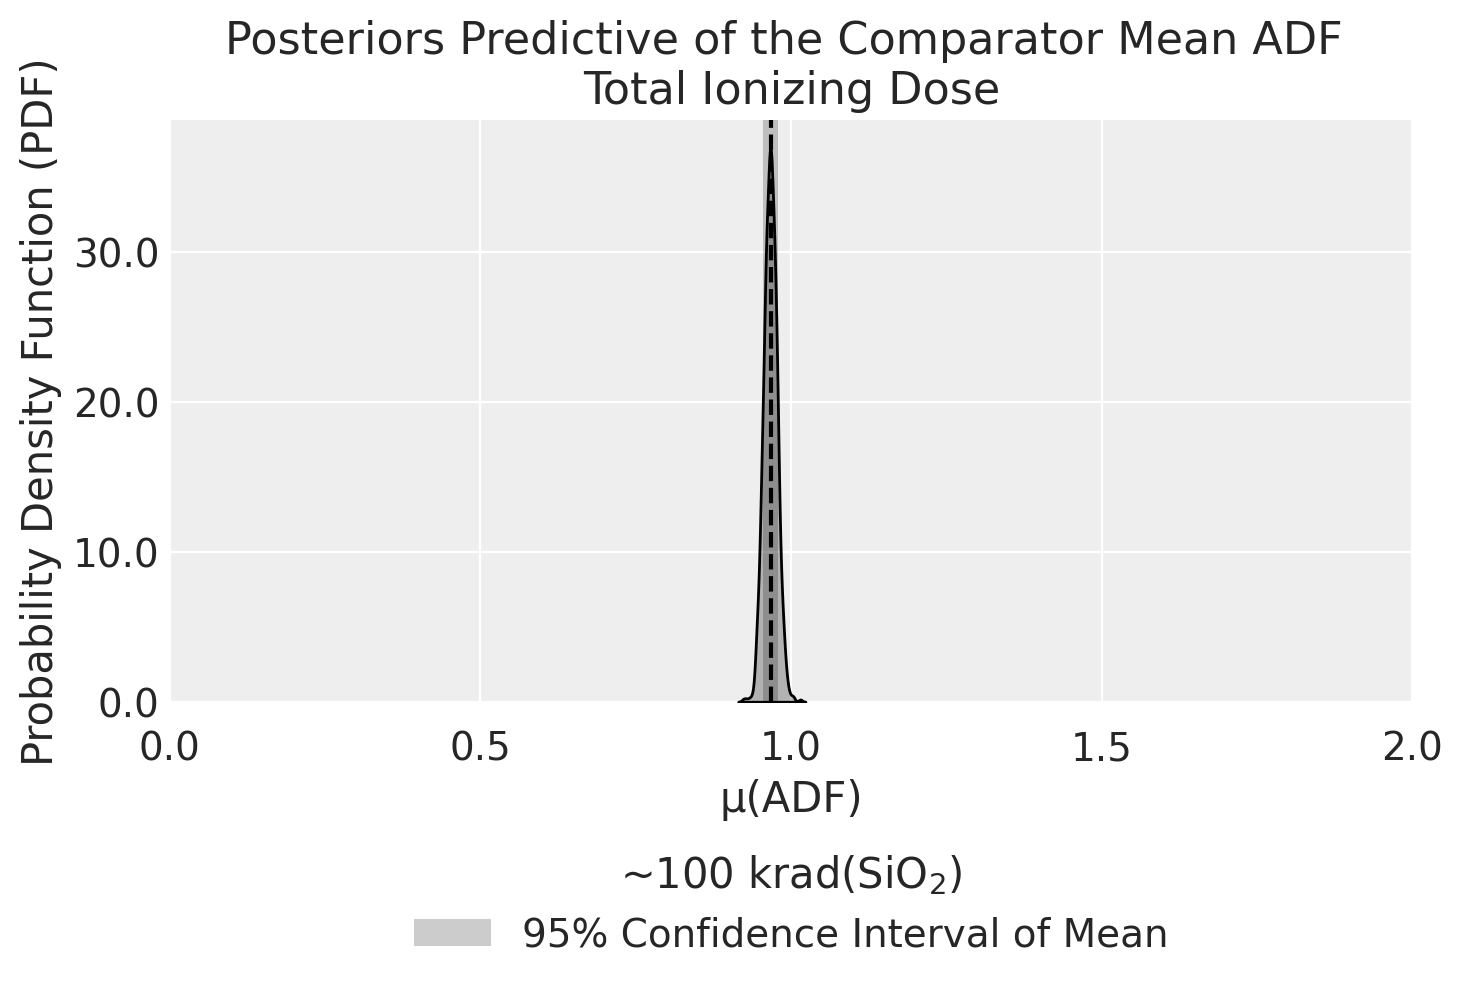

In [43]:
# Plotting PDFs of all Posteriors

# ADF at 100 krad
sns.kdeplot(
    [y.mean() for y in ppc100K['y_100K']],
    color='black',
    fill='True'    
)
plt.axvline(np.mean(allParts_meanList), color='black', linestyle='dashed')

# Plotting Bayesian confidence intervals
# Mean
plt.axvspan(res_mean.minmax[0],res_mean.minmax[1], facecolor='black', alpha=0.2, label=r'95% Confidence Interval of Mean')
# Standard Deviation
# plt.axvspan(res_std.minmax[0],res_std.minmax[1], facecolor='g', alpha=0.2, label=r'95% confidence interval of Standard Deviation')

# Plotting
plt.xlim([0, 2.001])
plt.xticks(np.arange(0, 2.001, 0.5))
plt.xlabel("µ(ADF)")
plt.tick_params(axis="x",direction="in", pad=10)

# plt.ylim([0, 11.001])
# plt.yticks(np.arange(0, 10.001, 1))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.ylabel('Probability Density Function (PDF)')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2)).set_title('~100 krad($\mathregular{SiO_2}$)', prop = {'size':15})

plt.title("Posteriors Predictive of the Comparator Mean ADF \nTotal Ionizing Dose")

In [37]:
print(min([y.mean() for y in ppc100K['y_100K']]))
print(max([y.mean() for y in ppc100K['y_100K']]))

0.9232188997738586
1.0151382899337436


[Text(0.5, 1.0, 'Posterior Predictive of the Comparator Mean ADF \nTotal Ionizing Dose'),
 Text(0.5, 0, 'µ(ADF)'),
 Text(0, 0.5, 'Counts')]

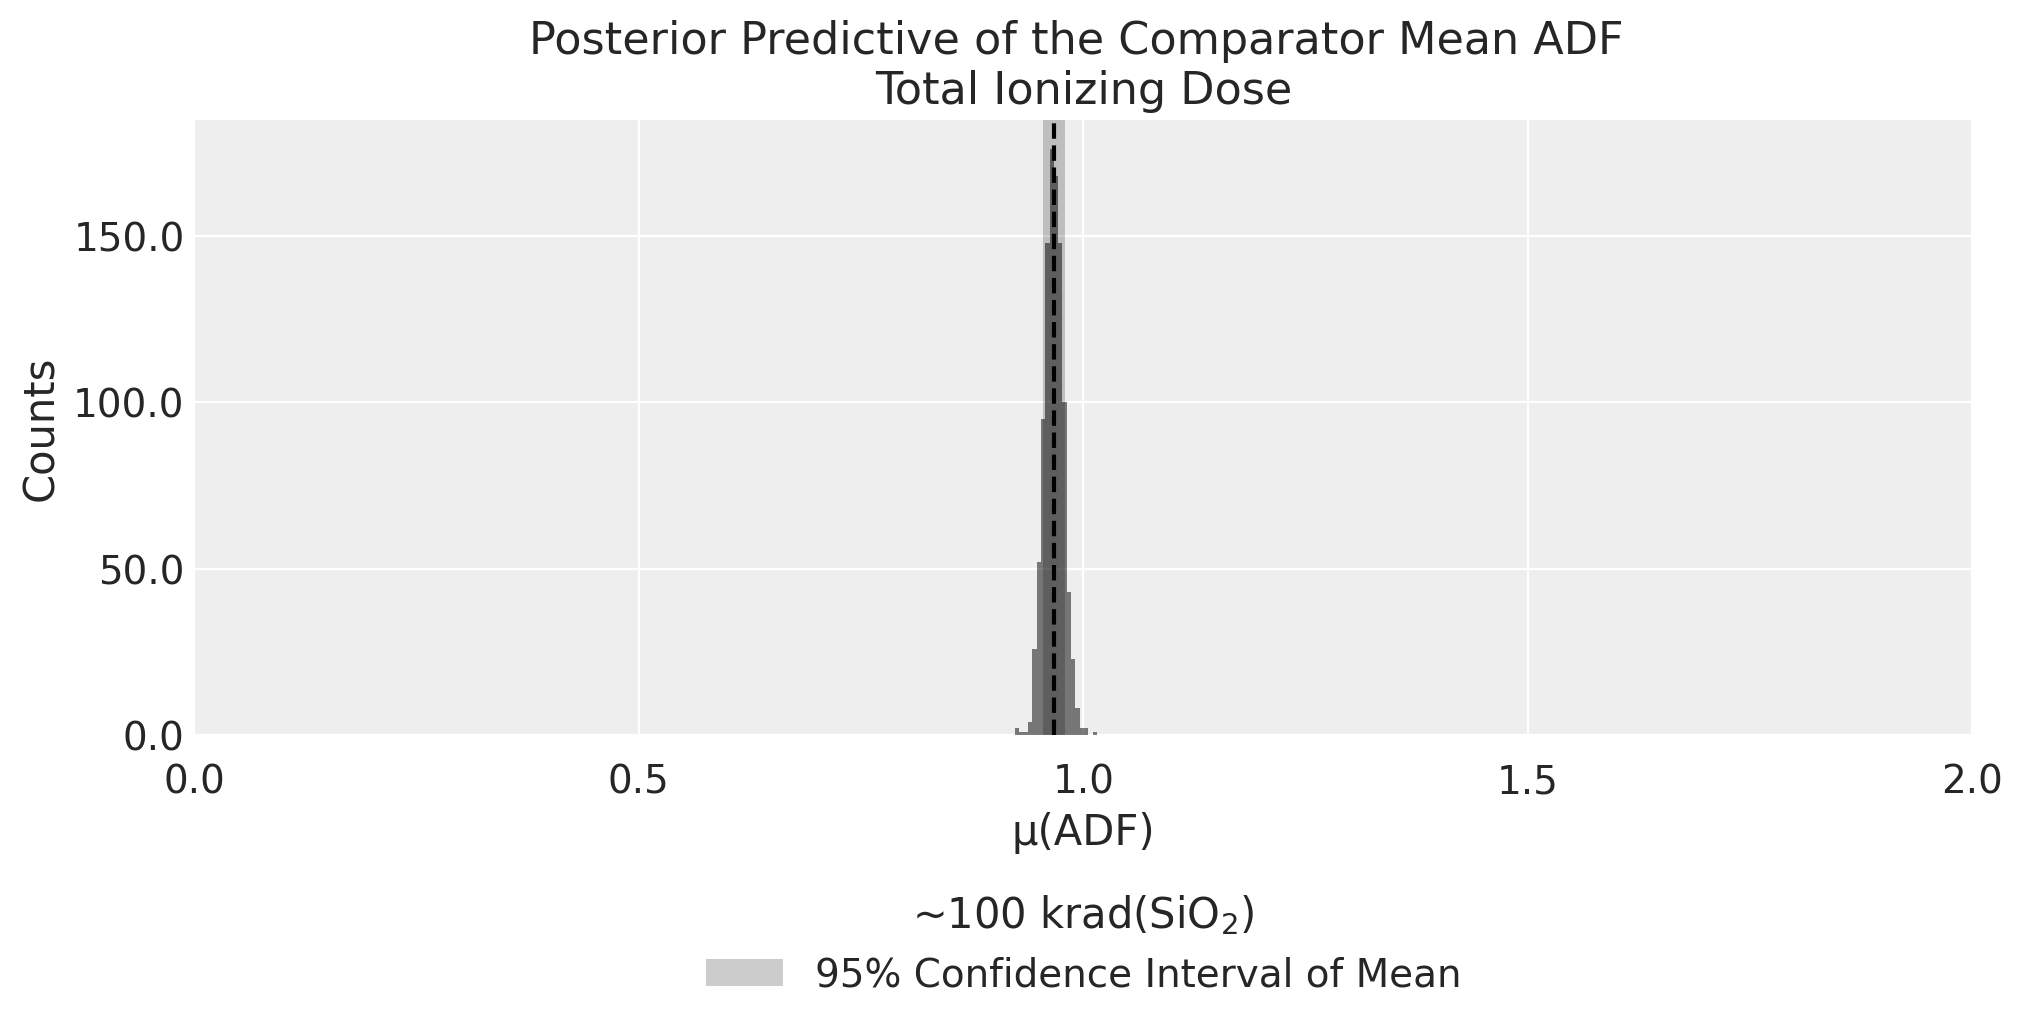

In [38]:
# Plotting all Posteriors Predictive of Mean

# 100 krad
_, ax = plt.subplots(figsize=(10, 5))
ax.hist([y.mean() for y in ppc100K['y_100K']], bins=19, alpha=0.5, color="black")
ax.axvline(np.mean(allParts_meanList), color="black", linestyle='dashed')

# Plotting Bayesian confidence intervals
# Mean
plt.axvspan(res_mean.minmax[0],res_mean.minmax[1], facecolor='black', alpha=0.2, label=r'95% Confidence Interval of Mean')
# Standard Deviation
# plt.axvspan(res_std.minmax[0],res_std.minmax[1], facecolor='g', alpha=0.2, label=r'95% confidence interval of Standard Deviation')

# Plotting
ax.set_xticks(np.arange(0, 2.001, 0.5))
plt.tick_params(axis="x",direction="in", pad=10)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2)).set_title('~100 krad($\mathregular{SiO_2}$)', prop = {'size':15})
ax.set(title="Posterior Predictive of the Comparator Mean ADF \nTotal Ionizing Dose", xlabel='µ(ADF)', ylabel='Counts')

[Text(0.5, 1.0, 'Posterior Predictive of the Mean Standard Deviation of the Comparator ADF \nTotal Ionizing Dose'),
 Text(0.5, 0, 'σ(ADF)'),
 Text(0, 0.5, 'Counts')]

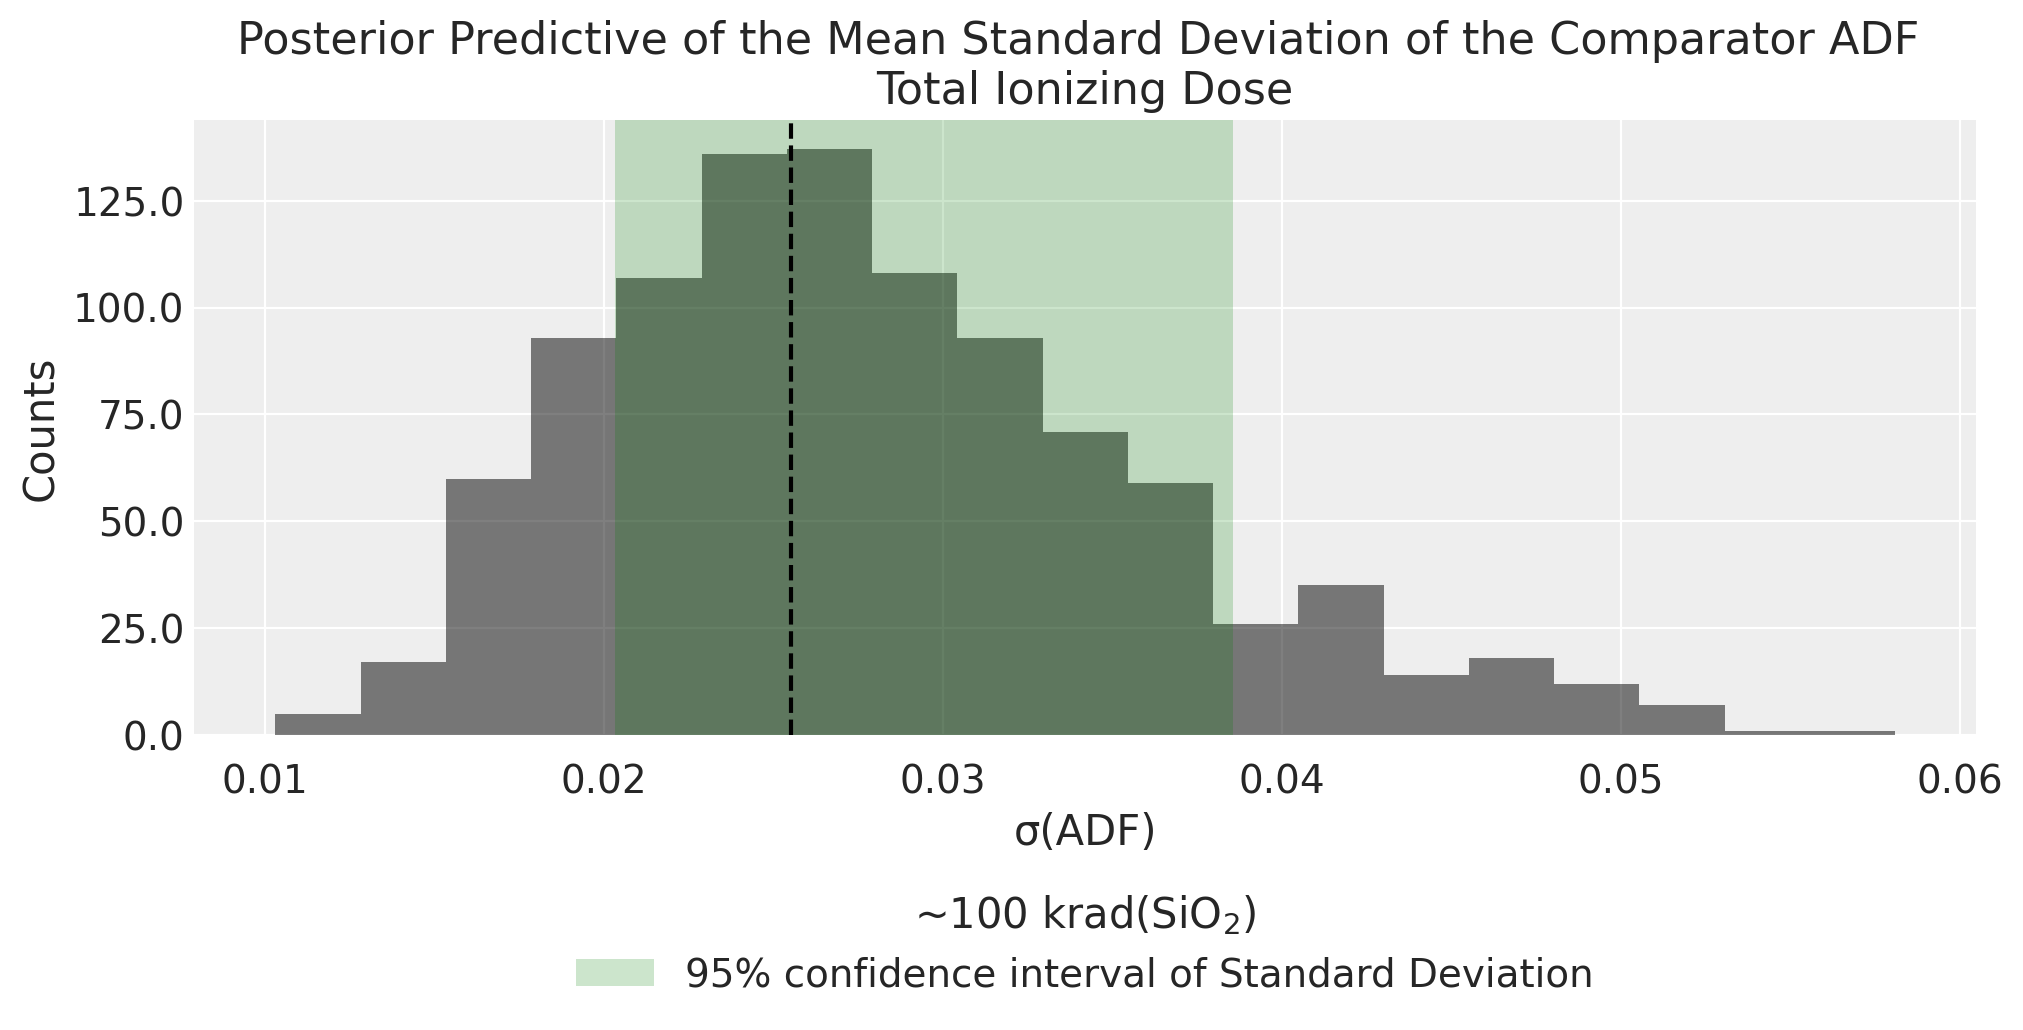

In [39]:
# Plotting all Posteriors Predictive of SD

# 100 krad
_, ax = plt.subplots(figsize=(10, 5))
ax.hist([y.std() for y in ppc100K['y_100K']], bins=19, alpha=0.5, color="black")
ax.axvline(np.std(allParts_meanList), color="black", linestyle='dashed')

# Plotting Bayesian confidence intervals
# Mean
# plt.axvspan(res_mean.minmax[0],res_mean.minmax[1], facecolor='black', alpha=0.2, label=r'95% Confidence Interval of Mean')
# Standard Deviation
plt.axvspan(res_std.minmax[0],res_std.minmax[1], facecolor='g', alpha=0.2, label=r'95% confidence interval of Standard Deviation')

# Plotting
# ax.set_xticks(np.arange(0, 1.6, 0.2))
# ax.set_yticks(np.arange(0, 201.0, 25.0))
plt.tick_params(axis="x",direction="in", pad=10)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2)).set_title('~100 krad($\mathregular{SiO_2}$)', prop = {'size':15})

ax.set(title="Posterior Predictive of the Mean Standard Deviation of the Comparator ADF \nTotal Ionizing Dose", xlabel='σ(ADF)', ylabel='Counts')

Text(0.5, 1.0, 'Posteriors Predictive of the Comparator Mean Standard Deviation ADF \nTotal Ionizing Dose')

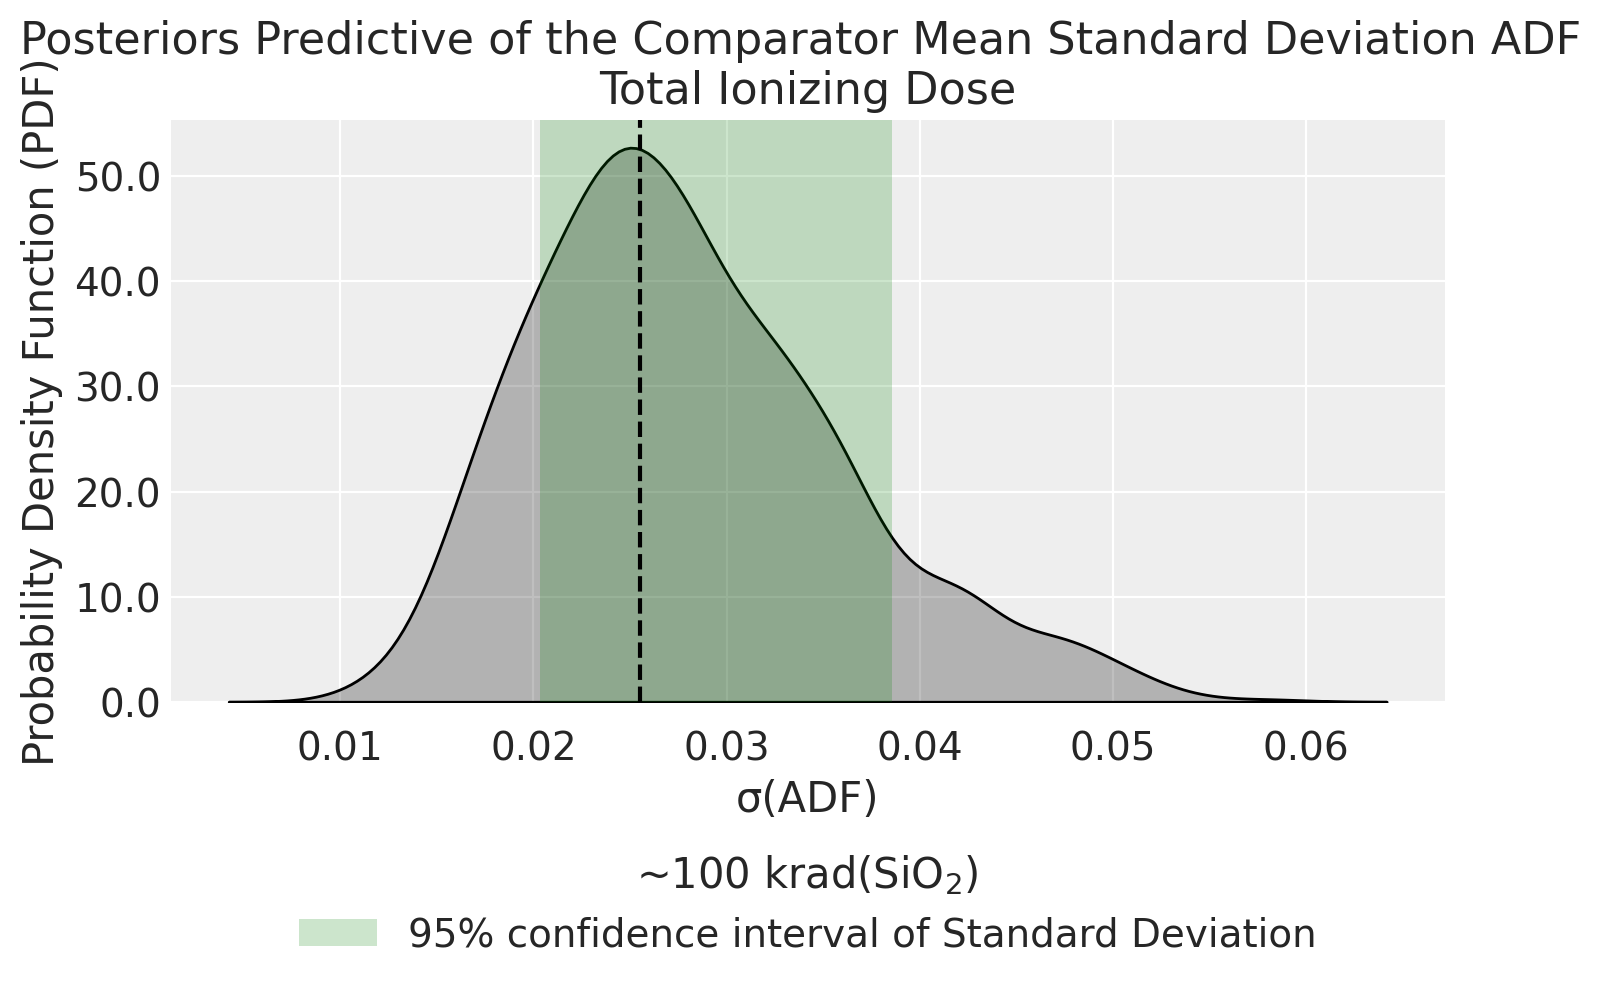

In [44]:
# Plotting PDFs of all Posteriors

# Gain Degradation at 100 krad
sns.kdeplot(
    [y.std() for y in ppc100K['y_100K']],
    color='black',
    fill='True'    
)
plt.axvline(np.std(allParts_meanList), color='black', linestyle='dashed')

# Plotting Bayesian confidence intervals
# Mean
# plt.axvspan(res_mean.minmax[0],res_mean.minmax[1], facecolor='black', alpha=0.2, label=r'95% Confidence Interval of Mean')
# Standard Deviation
plt.axvspan(res_std.minmax[0],res_std.minmax[1], facecolor='g', alpha=0.2, label=r'95% confidence interval of Standard Deviation')

# Plotting
# plt.xlim([0, 1.601])
# plt.xticks(np.arange(0, 1.601, 0.2))
plt.xlabel("σ(ADF)")
plt.tick_params(axis="x",direction="in", pad=10)

# plt.ylim([0, 18.501])
# plt.yticks(np.arange(0, 14.001, 1))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.ylabel('Probability Density Function (PDF)')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2)).set_title('~100 krad($\mathregular{SiO_2}$)', prop = {'size':15})

plt.title("Posteriors Predictive of the Comparator Mean Standard Deviation ADF \nTotal Ionizing Dose")

In [41]:
# Means from Data at 100K
partMean100K = np.array(allParts_meanList, dtype=np.float64)
print("Expected Mean is " + str(np.mean(partMean100K)))
print("Lot-to-Lot Standard Deviation is " + str(np.std(allParts_meanList)))

# Standard Deviations from Data
# partSD = np.array(partSD, dtype=np.float64)
# print(np.mean(partSD))
# print(np.std(partSD))

Expected Mean is 0.9670558211737776
Lot-to-Lot Standard Deviation is 0.0255275680777279
